In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
    
)

Found 25661 files belonging to 14 classes.


### Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 25661 files belonging to 14 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 14), dtype=tf.float32, name=None))>

### test if model is picking data

In [13]:
for x,y in training_set:
 print(x)
 print(y)
 break

tf.Tensor(
[[[[173.   167.   169.  ]
   [172.   166.   168.  ]
   [192.75 186.75 188.75]
   ...
   [123.   113.   112.  ]
   [121.75 111.75 110.75]
   [110.   100.    99.  ]]

  [[178.5  172.5  174.5 ]
   [184.5  178.5  180.5 ]
   [185.75 179.75 181.75]
   ...
   [122.   112.   111.  ]
   [118.25 108.25 107.25]
   [121.5  111.5  110.5 ]]

  [[179.   173.   175.  ]
   [179.5  173.5  175.5 ]
   [177.5  171.5  173.5 ]
   ...
   [117.5  107.5  106.5 ]
   [121.   111.   110.  ]
   [118.   108.   107.  ]]

  ...

  [[160.75 154.75 158.75]
   [156.75 150.75 154.75]
   [166.5  160.5  164.5 ]
   ...
   [135.75 126.75 129.75]
   [113.75 104.75 107.75]
   [129.75 120.75 123.75]]

  [[157.   151.   155.  ]
   [166.25 160.25 164.25]
   [176.5  170.5  174.5 ]
   ...
   [132.25 123.25 126.25]
   [136.25 127.25 130.25]
   [130.   121.   124.  ]]

  [[166.5  160.5  164.5 ]
   [173.   167.   171.  ]
   [178.   172.   176.  ]
   ...
   [113.5  104.5  107.5 ]
   [119.5  110.5  113.5 ]
   [125.   116.   11

### To Avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There maybe a chance of underfitting so increase the number of neurons
3. Add more convolution layer to extract more feature from image 

### Building Model

In [16]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()

## building Convolution Layer

In [20]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\CONDRAD\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [25]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2)) 

In [31]:
model.add(Dropout(0.25)) # to avoid overfitting

In [34]:
model.add(Flatten())

In [36]:
model.add(Dense(units=1500,activation='relu'))

In [37]:
model.add(Dropout(0.3)) 

## output Layer


In [41]:
model.add(Dense(units=14,activation='softmax'))

## compiling Model

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │          21,014 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,806,738 (29.78 MB)

 Trainable params: 7,806,738 (29.78 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [49]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2719s 3s/step - accuracy: 0.4897 - loss: 1.5098 - val_accuracy: 0.8606 - val_loss: 0.4066
Epoch 2/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2582s 3s/step - accuracy: 0.8336 - loss: 0.4812 - val_accuracy: 0.9086 - val_loss: 0.2580
Epoch 3/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2055s 3s/step - accuracy: 0.8927 - loss: 0.3076 - val_accuracy: 0.9513 - val_loss: 0.1421
Epoch 4/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2045s 3s/step - accuracy: 0.9194 - loss: 0.2291 - val_accuracy: 0.9350 - val_loss: 0.1897
Epoch 5/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2042s 3s/step - accuracy: 0.9424 - loss: 0.1653 - val_accuracy: 0.9656 - val_loss: 0.0960
Epoch 6/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2045s 3s/step - accuracy: 0.9471 - loss: 0.1558 - val_accuracy: 0.9682 - val_loss: 0.0877
Epoch 7/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2100s 3s/step - accuracy: 0.9670 - loss: 0.0998 - val_accuracy: 0.9824 - val_loss: 0.0563
Epoch 8/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 2096s 3s/step - accuracy: 0.9710 - loss: 0.0875 - 

### Model Evaluation

### Model Evaluation on training set

In [52]:
train_loss,train_acc = model.evaluate(training_set)

802/802 ━━━━━━━━━━━━━━━━━━━━ 461s 575ms/step - accuracy: 0.9866 - loss: 0.0423


In [53]:
print(train_loss,train_acc)

0.03771977499127388 0.9883870482444763


In [54]:
val_loss,val_acc = model.evaluate(validation_set)

802/802 ━━━━━━━━━━━━━━━━━━━━ 560s 698ms/step - accuracy: 0.9870 - loss: 0.0424


In [55]:
print(val_loss,val_acc)

0.03771974518895149 0.9883870482444763


### Saving Model

In [57]:
model.save("trained_model.keras")

In [58]:
training_history.history['val_accuracy']

[0.8606055974960327,
 0.9086161851882935,
 0.9512879252433777,
 0.934998631477356,
 0.9655898213386536,
 0.9682007431983948,
 0.9824246764183044,
 0.9816063046455383,
 0.983905553817749,
 0.9883870482444763]

### Accuracy Visualization

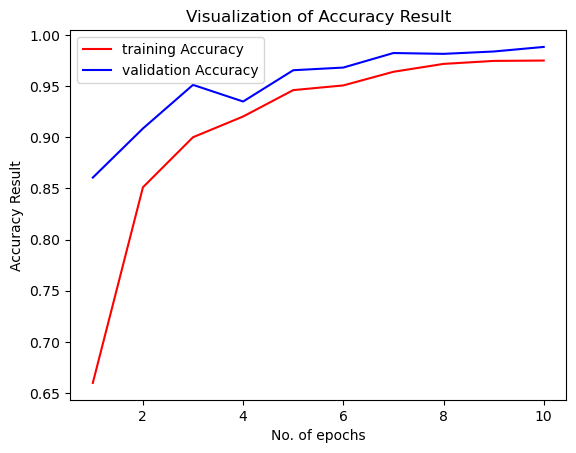

In [60]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metric for model evaluation

In [62]:
class_name = validation_set.class_names
class_name

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 25661 files belonging to 14 classes.


In [64]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

802/802 ━━━━━━━━━━━━━━━━━━━━ 491s 608ms/step


(array([[9.98207569e-01, 8.99036822e-05, 1.69229566e-03, ...,
         3.77046921e-10, 2.70851630e-09, 5.42333112e-09],
        [9.96629417e-01, 3.71459719e-05, 3.20098293e-03, ...,
         4.73987463e-08, 4.25570654e-08, 1.23825501e-07],
        [9.99170542e-01, 6.10074721e-06, 6.84129191e-05, ...,
         3.09761958e-08, 5.21119823e-08, 6.38141614e-07],
        ...,
        [1.20495645e-11, 1.90150182e-13, 1.08453318e-12, ...,
         7.73198034e-14, 7.48842940e-15, 1.00000000e+00],
        [2.75704237e-09, 3.33568659e-11, 1.86699489e-10, ...,
         2.28928716e-11, 3.42870307e-12, 9.99998927e-01],
        [1.88761048e-10, 2.82669981e-12, 4.39004388e-12, ...,
         8.85563324e-14, 2.04686948e-13, 1.00000000e+00]], dtype=float32),
 (25661, 14))